# Traffic sign detector
Detect traffic signs in real time on a mobile device (raspberry pi, phone)


**Requirements**
- Detect traffic signs (North American and German) with xx confidence
- Real time detection
- Fit in memory


**Implementation steps**
1. Define pipeline:
    * Get camera output into Pytorch arrays
    * Define buffer for model input
    * Bonus for demo on computer: Convert model output Pytorch array into video
    
2. Make an object detector predict bounding boxes around stop signs from images in ≤35ms
 
3. ...


**ToDo's**
- fix bounding boxes -> done
- make it faster
- 

## Example stop sign detection

In [1]:
# Imports
import os
from os import walk
import glob
import datetime

import numpy as np

import matplotlib.pyplot as plt
from PIL import Image
import matplotlib.patches as patches

import torch
import torchvision
from torchvision.transforms import ToTensor

In [2]:
# Parameter
path_in = r'input/'
path_out = r'output/'

thresh = 0.9


# Label names
COCO_INSTANCE_CATEGORY_NAMES = [
    '__background__', 'person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus',
    'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'N/A', 'stop sign',
    'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow',
    'elephant', 'bear', 'zebra', 'giraffe', 'N/A', 'backpack', 'umbrella', 'N/A', 'N/A',
    'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball',
    'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket',
    'bottle', 'N/A', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl',
    'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza',
    'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'N/A', 'dining table',
    'N/A', 'N/A', 'toilet', 'N/A', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone',
    'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'N/A', 'book',
    'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush'
]

In [59]:
# Load model
model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True, progress=True, num_classes=91, 
                                                             pretrained_backbone=True, trainable_backbone_layers=3,
                                                            min_size=800)

In [76]:
# Load data
print("Getting files...")
files = []

for (dirpath, dirnames, filenames) in walk(path_in):
    files.extend(filenames)    
    break
    
## Add files to list tensors
im_list = []

fnew = []

for f in files:
    if f == '.DS_Store':
        continue
    fnew.append(f)

files = fnew
print(files)


for f in files:
    img = Image.open(path_in + f)
    img = ToTensor()(img)
    im_list.append(img)

Getting files...
['IMG_1.JPG', 'Sect.JPG']


Locating objects...


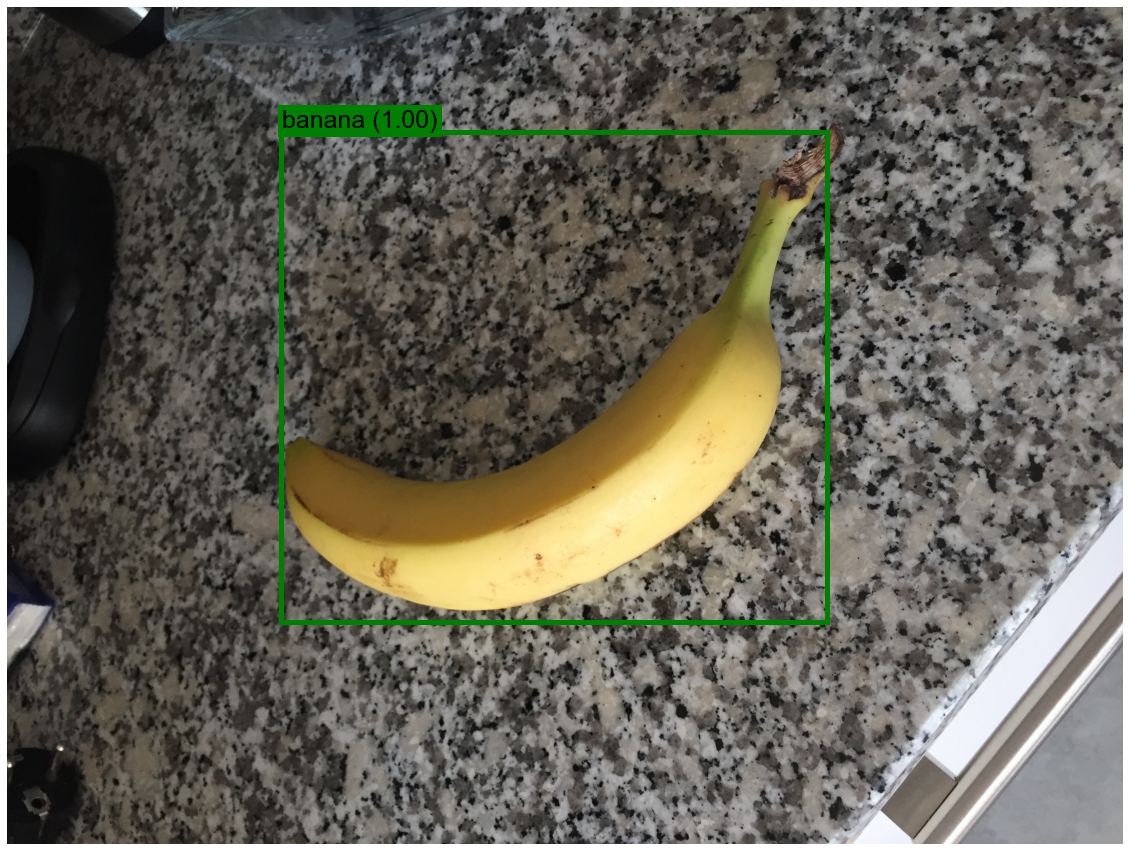

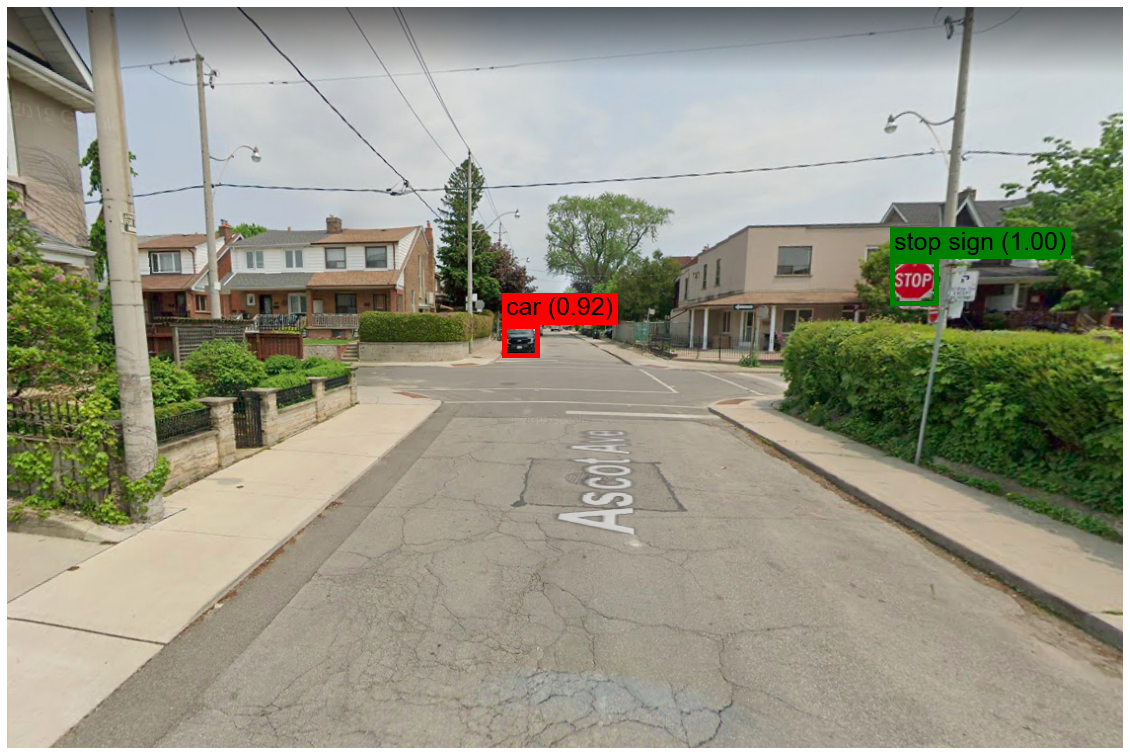

Done
0:00:25.731345


In [77]:
# Predict

begin_time = datetime.datetime.now()
print("Locating objects...")
model.eval()
predictions = model(im_list)


# Print output for each element
for i in range(len(files)):
    f = files[i]

    image = Image.open('./input/' + f)

    c = ['g', 'r', 'b', 'y','g', 'r', 'b', 'y', 'g', 'r', 'b', 'y', 'g', 'r', 'b', 'y']

    # Threshold conf
    scores = predictions[i]['scores'].detach().numpy()
    scores = scores[scores > thresh]

    # Boxes
    boxes = list(predictions[i]['boxes'].detach().numpy())
    labels = list(predictions[i]['labels'].detach().numpy())
    num_objects = len(scores)


    # Create figure and axes
    font = {'family': 'arial', 'size': 25}
    fig,ax = plt.subplots(1, figsize=(20, 20))
    ax.imshow(image)

    ## Draw boxes
    for obj in range(num_objects):

        box = boxes[obj]
       
        # Calculate coordinates for bounding box
        x1 = box[0]
        x2 = box[2]
        y1 = box[1]
        y2 = box[3]

        w = x2 - x1
        h = y2 - y1
        
        # Make bounding box
        rect = patches.Rectangle([x1, y1], [w], [h], linewidth=5,edgecolor=c[obj],facecolor='none')

        # Add the patch to the Axes
        ax.add_patch(rect)

        boxlabel = str(COCO_INSTANCE_CATEGORY_NAMES[labels[obj]]) + " ({:.2f})".format(scores[obj])

        plt.text(box[0]+2, box[1]-12, boxlabel , bbox=dict(facecolor=c[obj], edgecolor=c[obj]),
                 horizontalalignment='left', fontdict=font)

    ax.axis("off")
    plt.tight_layout
    plt.show()

    # Save image
    #plt.savefig(path_out + f[:-4] + "_boxes.png")
    
print("Done") 
print(datetime.datetime.now() - begin_time)

In [78]:
predictions

[{'boxes': tensor([[8.0129e+02, 3.6444e+02, 2.3972e+03, 1.7980e+03],
          [1.4325e+00, 2.1610e+03, 2.2090e+02, 2.4358e+03],
          [0.0000e+00, 3.9432e+02, 3.0827e+02, 1.3669e+03],
          [2.7923e+01, 4.5413e+01, 3.2054e+03, 2.4239e+03],
          [0.0000e+00, 3.9612e+02, 3.1885e+02, 1.3894e+03],
          [8.1086e+02, 9.6673e+02, 2.1514e+03, 1.7628e+03],
          [1.0936e+03, 3.6184e+02, 2.8098e+03, 2.3435e+03],
          [1.7255e+00, 1.7304e+03, 1.3761e+02, 1.9669e+03],
          [8.3369e+02, 6.2785e+02, 2.0359e+03, 1.4449e+03],
          [3.3084e+00, 4.0694e+02, 3.1218e+02, 1.7003e+03]],
         grad_fn=<StackBackward>),
  'labels': tensor([52, 18, 74, 67, 70, 52, 52, 81, 52, 89]),
  'scores': tensor([0.9958, 0.6132, 0.2358, 0.1755, 0.1184, 0.0890, 0.0823, 0.0778, 0.0669,
          0.0541], grad_fn=<IndexBackward>)},
 {'boxes': tensor([[895.8306, 257.1230, 940.6160, 299.7990],
          [503.4721, 323.4165, 536.6697, 352.1112],
          [532.0527, 322.6125, 543.1153, 3